In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# custom colors
colors = [(0/255.,191/255.,196/255.), (248/255.,118/255.,109/255.), (150/255.,120/255.,170/255.), (200/255.,150/255.,120/255.)]

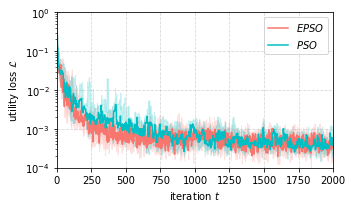

In [13]:
#w till ~ 01

fig, ax = plt.subplots(figsize=(5, 3))

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

agg = [percentile(25), percentile(75), 'median']

# decrease fitness
color = colors[1]
df = pd.read_csv('/home/froehlich/bnelearn/experiments/decrease/PSOLearner/single_item/first_price/uniform/symmetric/risk_neutral/2p/07-07-p85-g30/full_results.csv')
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
plt.plot(x, y, '-', label='$EPSO$', color=color)
plt.fill_between(x, mi, ma, alpha=.2, color=color)

# standard
color = colors[0]
df = pd.read_csv('/home/froehlich/bnelearn/experiments/decrease/PSOLearner/single_item/first_price/uniform/symmetric/risk_neutral/2p/07-08-reeval-10/full_results.csv')
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
plt.plot(x, y, '-', label='$PSO$', color=color)
plt.fill_between(x, mi, ma, alpha=.2, color=color)

# plot
ax.set_yscale('log')
ax.set_xlim([0, max(x)])
ax.set_ylim([1e-4, 1e0])
plt.grid(which='major', alpha=.5, linestyle='--')
ax.set_xlabel('iteration $t$')
ax.set_ylabel('utility loss $\mathcal{L}$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('decrease_fitness.pdf', format='pdf')
plt.show()